<a href="https://colab.research.google.com/github/arvind112k/Stock-price-prediction-using-stacked-LSTM/blob/main/STOCK_MARKET_PREDICTION_AND_FORECASTING_USING_STACKED_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing Libraries

In [10]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Load input data

In [13]:
df =pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv')
df=df.iloc[::-1]
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0


In [14]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0


In [16]:
df1=df.reset_index()['close']
df1

0       318.890
1       316.850
2       319.230
3       313.140
4       314.960
         ...   
1253    129.960
1254    130.535
1255    130.280
1256    131.780
1257    132.045
Name: close, Length: 1258, dtype: float64

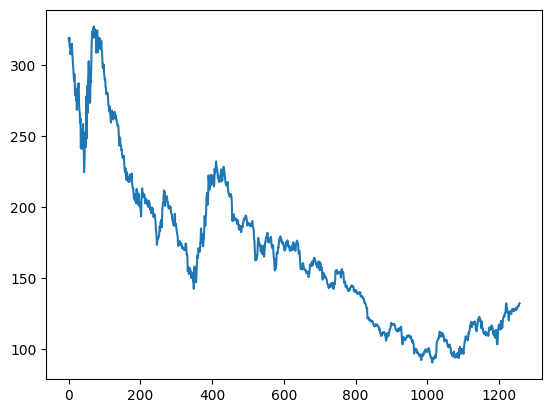

In [17]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [18]:
df1

0       318.890
1       316.850
2       319.230
3       313.140
4       314.960
         ...   
1253    129.960
1254    130.535
1255    130.280
1256    131.780
1257    132.045
Name: close, Length: 1258, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.96491598]
 [0.9563033 ]
 [0.96635143]
 ...
 [0.16862282]
 [0.17495567]
 [0.17607447]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [22]:
train_data

array([[0.96491598],
       [0.9563033 ],
       [0.96635143],
       [0.94064004],
       [0.9483239 ],
       [0.91771511],
       [0.92544119],
       [0.91746179],
       [0.93333615],
       [0.948535  ],
       [0.92793211],
       [0.90095415],
       [0.88782403],
       [0.87486279],
       [0.85628641],
       [0.83901883],
       [0.85898843],
       [0.83336148],
       [0.79473106],
       [0.8141096 ],
       [0.81326522],
       [0.77974331],
       [0.78426074],
       [0.75162543],
       [0.78776492],
       [0.8125475 ],
       [0.8289707 ],
       [0.8194292 ],
       [0.83049059],
       [0.77222832],
       [0.75002111],
       [0.74191506],
       [0.71388162],
       [0.7267162 ],
       [0.63780292],
       [0.65266402],
       [0.63569197],
       [0.69218104],
       [0.69437642],
       [0.66452757],
       [0.70970193],
       [0.65515494],
       [0.66089673],
       [0.56586169],
       [0.58642236],
       [0.65203074],
       [0.66001013],
       [0.686

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 317ms/step - loss: 0.0419 - val_loss: 0.0035
Epoch 2/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0078 - val_loss: 0.0156
Epoch 3/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0040 - val_loss: 0.0068
Epoch 4/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 5/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0014 - val_loss: 9.7202e-04
Epoch 7/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0013 - val_loss: 8.2824e-04
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0013 - val_loss: 9.7283e-04
Epoch 9/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
12/12 [==============================] - 3s 222ms/step - loss: 0.

In [33]:
tf.__version__

'2.14.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02265053672679981

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.014286775079560648

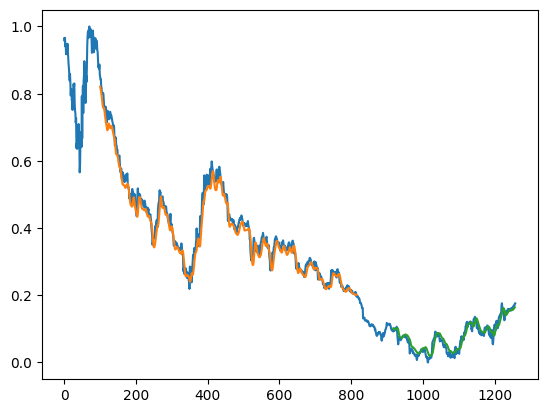

In [38]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

441

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.0908553575952039,
 0.08388921725914038,
 0.09055982436882547,
 0.08975766275436962,
 0.09195305243603817,
 0.0808916659630161,
 0.0862957021025078,
 0.0885333108165161,
 0.0862957021025078,
 0.0846069408089166,
 0.08122941822173434,
 0.08426918855019842,
 0.07903402854006585,
 0.09330406147091107,
 0.10288778181204081,
 0.10411213374989445,
 0.10124123955078942,
 0.09735708857552985,
 0.10499873342902974,
 0.09756818373722873,
 0.09955247825719835,
 0.11006501730980325,
 0.10951616988938614,
 0.10542092375242759,
 0.10077683019505188,
 0.09385290889132816,
 0.08363590306510175,
 0.09275521405049396,
 0.07992062821920119,
 0.08456472177657691,
 0.09288187114751333,
 0.07337667820653547,
 0.094655070505784,
 0.0968926792197923,
 0.09533057502322048,
 0.08169382757747189,
 0.05657350333530352,
 0.053955923330237285,
 0.06510174786793886,
 0.09419066115004646,
 0.10415435278223426,
 0.11044498860086124,
 0.11323144473528665,
 0.10816516085451319,
 0.10474541923499112,
 0.105125390526049

In [42]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.16779539]
101
1 day input [0.08388922 0.09055982 0.08975766 0.09195305 0.08089167 0.0862957
 0.08853331 0.0862957  0.08460694 0.08122942 0.08426919 0.07903403
 0.09330406 0.10288778 0.10411213 0.10124124 0.09735709 0.10499873
 0.09756818 0.09955248 0.11006502 0.10951617 0.10542092 0.10077683
 0.09385291 0.0836359  0.09275521 0.07992063 0.08456472 0.09288187
 0.07337668 0.09465507 0.09689268 0.09533058 0.08169383 0.0565735
 0.05395592 0.06510175 0.09419066 0.10415435 0.11044499 0.11323144
 0.10816516 0.10474542 0.10512539 0.09773706 0.12403952 0.10630752
 0.10466098 0.1058009  0.10259225 0.11863548 0.13071012 0.13522756
 0.13784514 0.13949168 0.13691632 0.14422021 0.14700667 0.14725998
 0.17060711 0.17618002 0.16583636 0.16115005 0.15401503 0.14890653
 0.14911762 0.13906949 0.12551718 0.13607194 0.14924428 0.15055307
 0.15241071 0.15308621 0.14812547 0.14434687 0.1537195  0.15688592
 0.15946129 0.15490163 0.15735033 0.15308621 0.15849025 0.15604154
 0.15730811 0.15443722 0.1554927  0

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1258

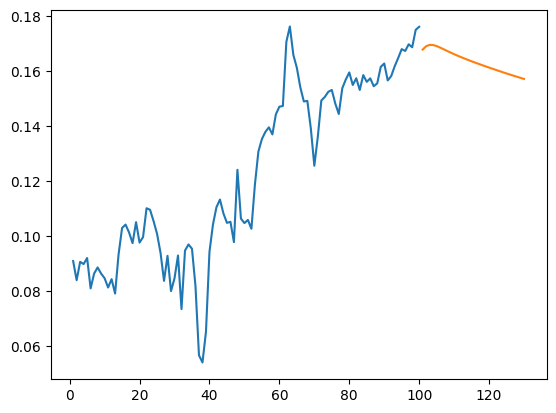

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

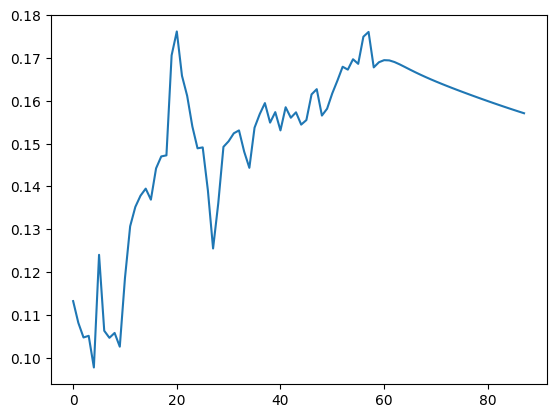

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

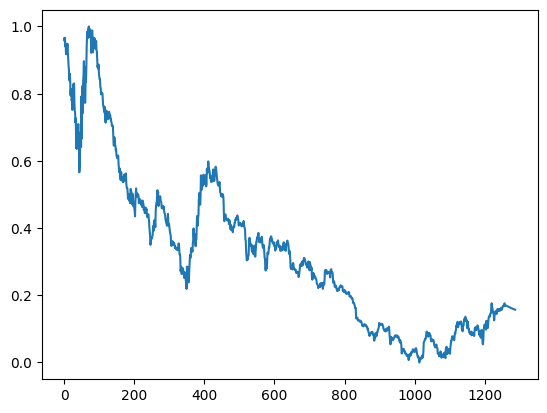

In [47]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)